<a href="https://colab.research.google.com/github/hellfireworld/MachineLearning/blob/master/digit_recognizer_FeedForwardNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Alexandros_Tsevrenis_MTN1914***

# **Import essential libraries**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
import io
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import IPython
from IPython.display import Image
import pydotplus

#pytorch utility imports
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
#neural net imports
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Import MNIST Dataset files with GOOGLE_COLAB**

In [0]:
from google.colab import files

In [6]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


# **Read the dataset from the CSV file**

In [0]:
file_train = r'/gdrive/My Drive/datasets/digit_recognizer_dataset_train.csv'
file_test = r'/gdrive/My Drive/datasets/digit_recognizer_dataset_test.csv'

**Define df variable as digit_recognizer_dataset_train.csv Define df2 variable as digit_recognizer_dataset_test.cs using pandas library.
Read separated values (csv) file into DataFrame.**

In [12]:
df = pd.read_csv(file_train)
df2 = pd.read_csv(file_test)
print(df)
print(df2)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
27995      6       0       0       0  ...         0         0         0         0
27996      0       0       0       0  ...         0         0         0         0
27997      8       0       0       0  ...         0         0         0         0
27998      0       0       0       0  ...         0         0         0         0
27999      7       0       0       0  ...         0         0         0         0

[28000 rows x 7

# **Print the shape of our whole data (rows, columns)**

In [13]:
print(df.shape)
print(df2.shape)

(28000, 785)
(14000, 784)


# **Plot Digit Nine from dataset**

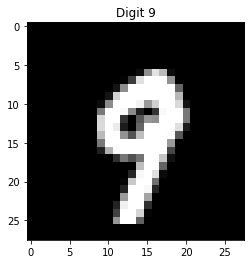

In [10]:
#nine
nine = df.iloc[28, 1:]
#print(nine.shape)
nine = nine.values.reshape(28, 28)
plt.imshow(nine, cmap='gray')
plt.title("Digit 9")
plt.show()

# **Firstly, split the pixelX features from the first column and store them in X, secondly store the first column as the prediction feature/variable as y**

This neural network runs on the CPU but there are commented codes that they could enable GPU usage to make it run faster(using NVIDIA feature CUDA).

Neural Network gets trained with Gradient Descent, backpropagation.

The criterion cross entropy loss has been chosen.

Dropout hyperparameter chooses to delete some information that the neural network has learned in every layer so at the end it doesn't overfit

`nn.BatchNorm1d` 
Applies Batch Normalization over a 2D or 3D input (a mini-batch of 1D inputs with optional additional channel dimension)

SoftMax hyperparameter normalize the outputs. All the numbers that softmax gets to the output they will be added to 1 and it creates percentages that belong to a specific classes.

`torch.optim.SGD`
SGD:
We know that gradient descent is the rate of loss function w.r.t the weights a.k.a model parameters. The loss function can be a function of the mean square of the losses accumulated over the entire training dataset. Hence the weights are updated once at the end of each epoch. This results in reaching the exact minimum but requires heavy computation time/epochs to reach that point.
On the other hand in SGD the weights are updated after looping via each training sample.

*   Weight initialisation: use a Gaussian distribution with zero mean and 0.01 standard deviation
(The initialisation function is actually very important to the success of a model and needs to
be chosen very carefully).
*   Layers (fully connected/“affine”): input (size=784), hidden (size=10, activation=Rectified
Linear (ReLU)), output (size=10, activation=Softmax).
*   Cost function: Cross Entropy Loss.
*   Optimiser: Stochastic Gradient Descent.
*   Batch size: 64.
*   Learning Rate: 0.1 (momentum coefficient= 0.9).
*   Number of epochs: 10


loop


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


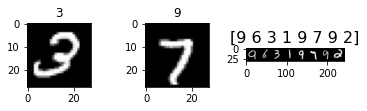

Net(
  (linear_block): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): LogSoftmax()
  )
)
test_counter:  [0, 22400, 44800, 67200, 89600, 112000, 134400, 156800, 179200, 201600]


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Train Epoch: 0 [640/22400 (3%)]	Loss: 1.535570
Train Epoch: 0 [1280/22400 (6%)]	Loss: 1.085312
Train Epoch: 0 [1920/22400 (9%)]	Loss: 1.040064
Train Epoch: 0 [2560/22400 (11%)]	Loss: 1.126373
Train Epoch: 0 [3200/22400 (14%)]	Loss: 1.167763
Train Epoch: 0 [3840/22400 (17%)]	Loss: 1.326905
Train Epoch: 0 [4480/22400 (20%)]	Loss: 1.250060
Train Epoch: 0 [5120/22400 (23%)]	Loss: 0.965823
Train Epoch: 0 [5760/22400 (26%)]	Loss: 0.951358
Train Epoch: 0 [6400/22400 (29%)]	Loss: 1.009950
Train Epoch: 0 [7040/22400 (31%)]	Loss: 1.009113
Train Epoch: 0 [7680/22400 (34%)]	Loss: 1.001126
Train Epoch: 0 [8320/22400 (37%)]	Loss: 1.131799
Train Epoch: 0 [8960/22400 (40%)]	Loss: 0.923753
Train Epoch: 0 [9600/22400 (43%)]	Loss: 0.888170
Train Epoch: 0 [10240/22400 (46%)]	Loss: 1.051063
Train Epoch: 0 [10880/22400 (49%)]	Loss: 0.992225
Train Epoch: 0 [11520/22400 (51%)]	Loss: 1.046490
Train Epoch: 0 [12160/22400 (54%)]	Loss: 1.080112
Train Epoch: 0 [12800/22400 (57%)]	Loss: 0.899153
Train Epoch: 0 [134

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


test_loss:  [0.4593004882335663]

Average Val Loss: 0.4593, Val Accuracy: 5036/5600 (89.929%)

Train Epoch: 1 [640/22400 (3%)]	Loss: 1.171402
Train Epoch: 1 [1280/22400 (6%)]	Loss: 0.834312
Train Epoch: 1 [1920/22400 (9%)]	Loss: 1.190946
Train Epoch: 1 [2560/22400 (11%)]	Loss: 0.720074
Train Epoch: 1 [3200/22400 (14%)]	Loss: 0.969809
Train Epoch: 1 [3840/22400 (17%)]	Loss: 0.797122
Train Epoch: 1 [4480/22400 (20%)]	Loss: 0.907901
Train Epoch: 1 [5120/22400 (23%)]	Loss: 0.694505
Train Epoch: 1 [5760/22400 (26%)]	Loss: 1.167158
Train Epoch: 1 [6400/22400 (29%)]	Loss: 1.021275
Train Epoch: 1 [7040/22400 (31%)]	Loss: 1.027883
Train Epoch: 1 [7680/22400 (34%)]	Loss: 0.640914
Train Epoch: 1 [8320/22400 (37%)]	Loss: 0.987843
Train Epoch: 1 [8960/22400 (40%)]	Loss: 0.829607
Train Epoch: 1 [9600/22400 (43%)]	Loss: 1.028033
Train Epoch: 1 [10240/22400 (46%)]	Loss: 1.027866
Train Epoch: 1 [10880/22400 (49%)]	Loss: 0.848896
Train Epoch: 1 [11520/22400 (51%)]	Loss: 0.896591
Train Epoch: 1 [12160/22

In [14]:
if __name__ == '__main__':
    # stops the freeze error
    torch.multiprocessing.freeze_support()
    print('loop')

    # GPU CUDA
    # check cuda version
    #print(torch.cuda.is_available())
    #print(torch.backends.cudnn.enabled)
    #if torch.cuda.is_available():
    #    device = torch.device('cuda')
    #print(device)

    train_df = df
    test_df = df2
    #train_df = df.iloc[:28000, :]
    #test_df = df.iloc[28000:, :]

    y_train = train_df['label'].values
    X_train = (train_df.iloc[:, 1:].values).astype('float32')
    test_images = (test_df.iloc[:, :].values).astype('float32')

    # Training and Validation Split
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                                          stratify=y_train, random_state=123,
                                                                          test_size=0.20)
    X_train = X_train.reshape(X_train.shape[0], 28, 28)
    X_val = X_val.reshape(X_val.shape[0], 28, 28)
    test_images = test_images.reshape(test_images.shape[0], 28, 28)

    # train samples
    for i in range(6, 9):
        plt.subplot(330 + (i + 1))
        plt.imshow(X_train[i].squeeze(), cmap=plt.get_cmap('gray'))
        plt.title(y_train[i])

    # test samples
    for i in range(6, 9):
        plt.subplot(330 + (i + 1))
        plt.imshow(test_images[i].squeeze(), cmap=plt.get_cmap('gray'))


    # train
    X_train_tensor = torch.tensor(X_train) / 255.0
    y_train_tensor = torch.tensor(y_train)
    train_tensor = TensorDataset(X_train_tensor, y_train_tensor)

    # val
    X_val_tensor = torch.tensor(X_val) / 255.0
    y_val_tensor = torch.tensor(y_val)
    val_tensor = TensorDataset(X_val_tensor, y_val_tensor)

    # test
    test_images_tensor = torch.tensor(test_images) / 255.0

    train_loader = DataLoader(train_tensor, batch_size=64, num_workers=2, shuffle=True)
    val_loader = DataLoader(val_tensor, batch_size=64, num_workers=2, shuffle=True)
    test_loader = DataLoader(test_images_tensor, batch_size=64, num_workers=2, shuffle=False)

    for batch_idx, (data, target) in enumerate(train_loader):
        img_grid = make_grid(data[0:8, ].unsqueeze(1), nrow=8)
        img_target_labels = target[0:8, ].numpy()
        break

    plt.imshow(img_grid.numpy().transpose((1, 2, 0)))
    plt.rcParams['figure.figsize'] = (10, 2)
    plt.title(img_target_labels, size=16)
    plt.show()



    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()


            self.linear_block = nn.Sequential(
                nn.Linear(784, 10),
                nn.BatchNorm1d(10),
                nn.ReLU(inplace=True),
                nn.Dropout(0.2),
                nn.LogSoftmax(dim=1)
            )

        def forward(self, x):
            #x = self.conv_block(x)
            x = x.view(x.size(0), -1)
            x = self.linear_block(x)

            return x

    network_model = Net()
    print(network_model)

    optimizer = optim.SGD(params=network_model.parameters(), lr=0.1, momentum=0.9)
    #optimizer = optim.Adam(params=network_model.parameters(), lr=0.001, momentum)
    criterion = nn.CrossEntropyLoss()
    exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    # GPU CUDA
    #if torch.cuda.is_available():
    #    network_model = network_model.cuda()
    #    criterion = criterion.cuda()

    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(10)]
    print('test_counter: ', test_counter)

    def train_model(num_epoch):
        network_model.train()
        exp_lr_scheduler.step()

        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.unsqueeze(1)
            data, target = data, target

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()
            #    target = target.cuda()

            optimizer.zero_grad()
            output = network_model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            if( (batch_idx+1) % 10 == 0 ):
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    num_epoch, (batch_idx+1) * len(data), len(train_loader.dataset),
                               100. * (batch_idx+1) / len(train_loader), loss.data))
                train_losses.append(loss.item())
                train_counter.append( (batch_idx+64)+ ((num_epoch)*len(train_loader.dataset)))


    def evaluate(data_loader):
        network_model.eval()
        loss = 0
        correct = 0

        for data, target in data_loader:
            data = data.unsqueeze(1)
            data, target = data, target

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()
            #    target = target.cuda()

            output = network_model(data)

            loss += F.cross_entropy(output, target, size_average=False).data
            

            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()

        loss /= len(data_loader.dataset)
        test_losses.append(loss.item())
        print('test_loss: ', test_losses)

        print('\nAverage Val Loss: {:.4f}, Val Accuracy: {}/{} ({:.3f}%)\n'.format(loss, correct, len(data_loader.dataset),
                                                                                   100. * correct / len(data_loader.dataset)))

    num_epochs = 10

    for n in range(num_epochs):
        train_model(n)
        evaluate(val_loader)

    def make_predictions(data_loader):
        network_model.eval()
        test_preds = torch.LongTensor()

        for i, data in enumerate(data_loader):
            data = data.unsqueeze(1)

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()

            output = network_model(data)

            preds = output.cpu().data.max(1, keepdim=True)[1]
            test_preds = torch.cat((test_preds, preds), dim=0)

        return test_preds

    test_set_preds = make_predictions(test_loader)



# **Show predicted MNIST numbers for model net1**

    ImageId  Label
0         1      3
1         2      1
2         3      3
3         4      7
4         5      0
5         6      1
6         7      3
7         8      7
8         9      2
9        10      8
10       11      7
11       12      1
12       13      7
13       14      2
14       15      9
15       16      6


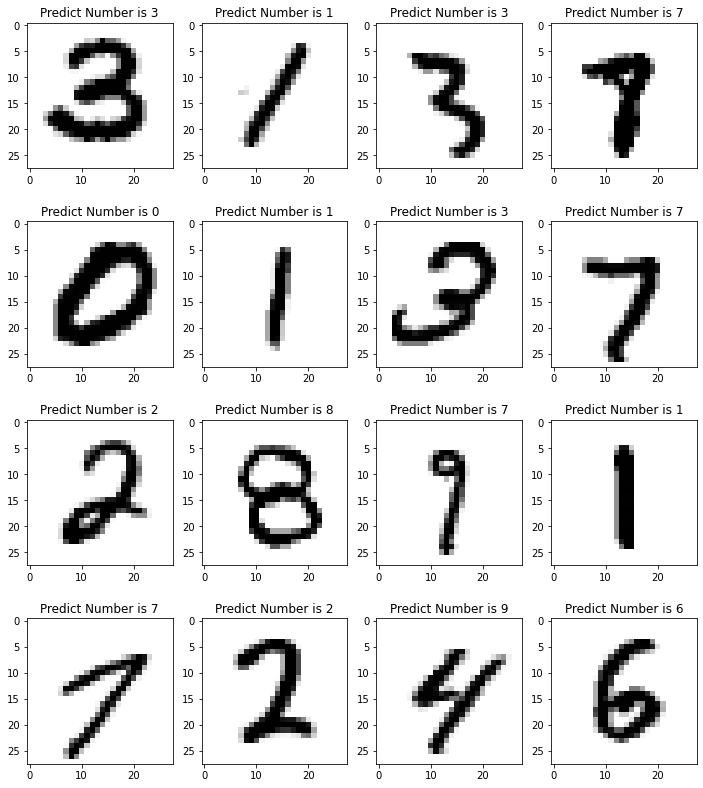

In [15]:
sample_subm = r'/gdrive/My Drive/datasets/sample_submission.csv'
submission_df = pd.read_csv(sample_subm)    

submission_df['Label'] = test_set_preds.numpy().squeeze()
print(submission_df.iloc[:16, :2])
#submission_df.head()
#print(test_set_preds)
y_pred = submission_df['Label'].values

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_images[i], cmap='binary')
    ax.set(title = f"Predict Number is {y_pred[i]}");


`optim.Adam` Adam’s method considered as a method of Stochastic Optimization is a technique implementing adaptive learning rate. Whereas in normal SGD the learning rate has an equivalent type of effect for all the weights/parameters of the model.

`self.linear_block2.apply(init_weights)`
Apply Havier initialization Recursively


*   Weight initialisation: use a xavier initialization
(The initialisation function is actually very important to the success of a model and needs to
be chosen very carefully).
*   4 Layers
*   Cost function: Cross Entropy Loss.
*   Optimiser: Adam.
*   Batch size: 64.
*   Learning Rate: 0.003.
*   Number of epochs: 25




In [17]:
    class Net2(nn.Module):
        def __init__(self):
            super(Net2, self).__init__()

            #self.linear_block = nn.Sequential(
            #    nn.Linear(784, 10),
            #    nn.BatchNorm1d(10),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.LogSoftmax(dim=1)
            #)
            
            def init_weights(m):
                if type(m) == nn.Linear:
                    #nn.init.xavier_normal(m.weight)
                    nn.init.xavier_uniform(m.weight)
                    m.bias.data.fill_(0.01)

            self.linear_block2 = nn.Sequential(
                nn.Linear(784, 400),
                nn.BatchNorm1d(400),
                nn.ReLU(inplace=True),
                nn.Dropout(0.3),
                nn.Linear(400, 200),
                nn.BatchNorm1d(200),
                nn.ReLU(inplace=True),
                nn.Dropout(0.3),
                nn.Linear(200, 64),
                nn.BatchNorm1d(64),
                nn.ReLU(inplace=True),
                nn.Dropout(0.4),
                nn.Linear(64, 10),
                #nn.MaxPool2d(kernel_size=2),
                nn.LogSoftmax(dim=1)
            )
            #self.linear_block2 = nn.Sequential(
            #    nn.Linear(784, 128),
            #    nn.BatchNorm1d(128),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.Linear(128, 64),
            #    nn.BatchNorm1d(64),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.Linear(64, 10),
            #    #nn.MaxPool2d(kernel_size=2),
            #    nn.LogSoftmax(dim=1)
            #)
            #self.linear_block2 = nn.Sequential(
            #    nn.Linear(784, 300),
            #    nn.BatchNorm1d(300),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.Linear(300, 200),
            #    nn.BatchNorm1d(200),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.Linear(200, 128),
            #    nn.BatchNorm1d(128),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.Linear(128, 64),
            #    nn.BatchNorm1d(64),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.Linear(64, 10),
            #    #nn.MaxPool2d(kernel_size=2),
            #    nn.LogSoftmax(dim=1)
            #)

            #APPLY HAVIER INITIALIZATION RECURSIVELY 
            self.linear_block2.apply(init_weights)

            #input_size = 784
            #hidden_sizes = [128 , 64]
            #output_size = 10

            #model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
            #          nn.ReLU(),
            #          nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            #          nn.ReLU(),
            #          nn.Linear(hidden_sizes[1], output_size),
            #          nn.LogSoftmax(dim=1))
            #print(model)

        def forward(self, x):
            #x = self.conv_block(x)
            x = x.view(x.size(0), -1)
            x = self.linear_block2(x)

            return x

    network_model2 = Net2()
    print(network_model2)

    optimizer2 = optim.Adam(params=network_model2.parameters(), lr=0.003)
    #optimizer2 = optim.SGD(params=network_model2.parameters(), lr=0.001, momentum=1)
    criterion2 = nn.CrossEntropyLoss()
    exp_lr_scheduler2 = optim.lr_scheduler.StepLR(optimizer2, step_size=7, gamma=0.1)


    # GPU CUDA
    #if torch.cuda.is_available():
    #    network_model = network_model.cuda()
    #    criterion = criterion.cuda()

    train_losses2 = []
    train_counter2 = []
    test_losses2 = []
    test_counter2 = [i*len(train_loader.dataset) for i in range(25)]
    #print('test_counter: ', test_counter2)

    def train_model2(num_epoch):
        network_model2.train()
        exp_lr_scheduler2.step()


        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.unsqueeze(1)
            data, target = data, target

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()
            #    target = target.cuda()

            optimizer2.zero_grad()
            output2 = network_model2(data)
            loss2 = criterion(output2, target)
            loss2.backward()
            optimizer2.step()

            if( (batch_idx+1) % 10 == 0 ):
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    num_epoch, (batch_idx+1) * len(data), len(train_loader.dataset),
                               100. * (batch_idx+1) / len(train_loader), loss2.data))
                train_losses2.append(loss2.item())
                train_counter2.append( (batch_idx+64)+ ((num_epoch)*len(train_loader.dataset)))
            #if( (batch_idx + 1) % 100 == 0 ):
            #    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            #        num_epoch, (batch_idx + 1) * len(data), len(train_loader.dataset),
            #                   100. * (batch_idx + 1) / len(train_loader), loss2.data))
            #    train_losses2.append(loss2.item())
            #    train_counter2.append( (batch_idx+64)+ ((num_epoch-1)*len(train_loader.dataset)))


    def evaluate2(data_loader):
        network_model2.eval()
        loss2 = 0
        correct2 = 0

        for data, target in data_loader:
            data = data.unsqueeze(1)
            data, target = data, target

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()
            #    target = target.cuda()

            output2 = network_model2(data)

            loss2 += F.cross_entropy(output2, target, size_average=False).data
            

            pred2 = output2.data.max(1, keepdim=True)[1]
            correct2 += pred2.eq(target.data.view_as(pred2)).cpu().sum()

        loss2 /= len(data_loader.dataset)
        test_losses2.append(loss2.item())
        #print('test_loss: ', test_losses)

        print('\nAverage Val Loss: {:.4f}, Val Accuracy: {}/{} ({:.3f}%)\n'.format(loss2, correct2, len(data_loader.dataset),
                                                                                   100. * correct2 / len(data_loader.dataset)))

    num_epochs = 25

    for n in range(num_epochs):
        train_model2(n)
        evaluate2(val_loader)

    #better_model
    #for n in range(25):
    #    train_model(n)
    #    evaluate(val_loader)

    def make_predictions2(data_loader):
        network_model2.eval()
        test_preds2 = torch.LongTensor()

        for i, data in enumerate(data_loader):
            data = data.unsqueeze(1)

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()

            output2 = network_model2(data)

            preds2 = output2.cpu().data.max(1, keepdim=True)[1]
            test_preds2 = torch.cat((test_preds2, preds2), dim=0)

        return test_preds2

    test_set_preds2 = make_predictions2(test_loader)


Net2(
  (linear_block2): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=400, out_features=200, bias=True)
    (5): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=200, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=64, out_features=10, bias=True)
    (13): LogSoftmax()
  )
)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Train Epoch: 0 [640/22400 (3%)]	Loss: 1.441116
Train Epoch: 0 [1280/22400 (6%)]	Loss: 0.743873
Train Epoch: 0 [1920/22400 (9%)]	Loss: 0.688965
Train Epoch: 0 [2560/22400 (11%)]	Loss: 0.791678
Train Epoch: 0 [3200/22400 (14%)]	Loss: 0.611581
Train Epoch: 0 [3840/22400 (17%)]	Loss: 0.745180
Train Epoch: 0 [4480/22400 (20%)]	Loss: 0.576927
Train Epoch: 0 [5120/22400 (23%)]	Loss: 0.397297
Train Epoch: 0 [5760/22400 (26%)]	Loss: 0.372769
Train Epoch: 0 [6400/22400 (29%)]	Loss: 0.410139
Train Epoch: 0 [7040/22400 (31%)]	Loss: 0.629584
Train Epoch: 0 [7680/22400 (34%)]	Loss: 0.207846
Train Epoch: 0 [8320/22400 (37%)]	Loss: 0.368147
Train Epoch: 0 [8960/22400 (40%)]	Loss: 0.401688
Train Epoch: 0 [9600/22400 (43%)]	Loss: 0.589706
Train Epoch: 0 [10240/22400 (46%)]	Loss: 0.251270
Train Epoch: 0 [10880/22400 (49%)]	Loss: 0.594582
Train Epoch: 0 [11520/22400 (51%)]	Loss: 0.287384
Train Epoch: 0 [12160/22400 (54%)]	Loss: 0.309084
Train Epoch: 0 [12800/22400 (57%)]	Loss: 0.472938
Train Epoch: 0 [134

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Average Val Loss: 0.1717, Val Accuracy: 5304/5600 (94.714%)

Train Epoch: 1 [640/22400 (3%)]	Loss: 0.206737
Train Epoch: 1 [1280/22400 (6%)]	Loss: 0.298204
Train Epoch: 1 [1920/22400 (9%)]	Loss: 0.262546
Train Epoch: 1 [2560/22400 (11%)]	Loss: 0.183485
Train Epoch: 1 [3200/22400 (14%)]	Loss: 0.317441
Train Epoch: 1 [3840/22400 (17%)]	Loss: 0.217885
Train Epoch: 1 [4480/22400 (20%)]	Loss: 0.276829
Train Epoch: 1 [5120/22400 (23%)]	Loss: 0.378352
Train Epoch: 1 [5760/22400 (26%)]	Loss: 0.161417
Train Epoch: 1 [6400/22400 (29%)]	Loss: 0.176365
Train Epoch: 1 [7040/22400 (31%)]	Loss: 0.235552
Train Epoch: 1 [7680/22400 (34%)]	Loss: 0.390078
Train Epoch: 1 [8320/22400 (37%)]	Loss: 0.308365
Train Epoch: 1 [8960/22400 (40%)]	Loss: 0.417409
Train Epoch: 1 [9600/22400 (43%)]	Loss: 0.105887
Train Epoch: 1 [10240/22400 (46%)]	Loss: 0.189805
Train Epoch: 1 [10880/22400 (49%)]	Loss: 0.186010
Train Epoch: 1 [11520/22400 (51%)]	Loss: 0.289325
Train Epoch: 1 [12160/22400 (54%)]	Loss: 0.148798
Train E

# **Show predicted MNIST numbers for better optimized model net2**

    ImageId  Label
0         1      3
1         2      1
2         3      3
3         4      7
4         5      0
5         6      1
6         7      3
7         8      7
8         9      2
9        10      8
10       11      7
11       12      1
12       13      7
13       14      2
14       15      4
15       16      6


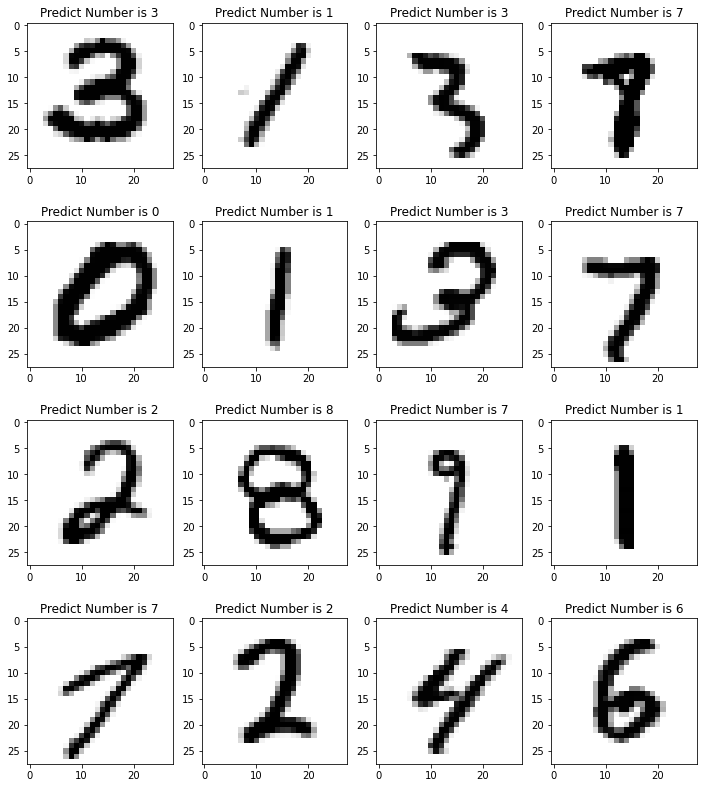

In [19]:
sample_subm2 = r'/gdrive/My Drive/datasets/sample_submission2.csv'
submission_df2 = pd.read_csv(sample_subm2)    

submission_df2['Label'] = test_set_preds2.numpy().squeeze()
print(submission_df2.iloc[:16, :2])
#submission_df.head()
#print(test_set_preds)
y_pred2 = submission_df2['Label'].values

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_images[i], cmap='binary')
    ax.set(title = f"Predict Number is {y_pred2[i]}");



# **Plot Negative Log Likelihood for model net2**

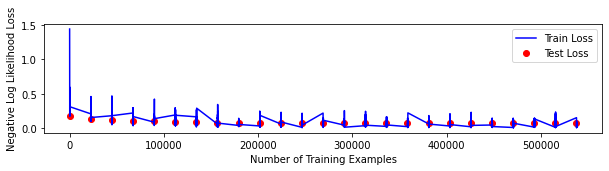

In [20]:
    fig = plt.figure()
    plt.plot(train_counter2, train_losses2, color='blue')
    plt.scatter(test_counter2, test_losses2, color='red')
    plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Negative Log Likelihood Loss')
    plt.show()
